# Вариант №10

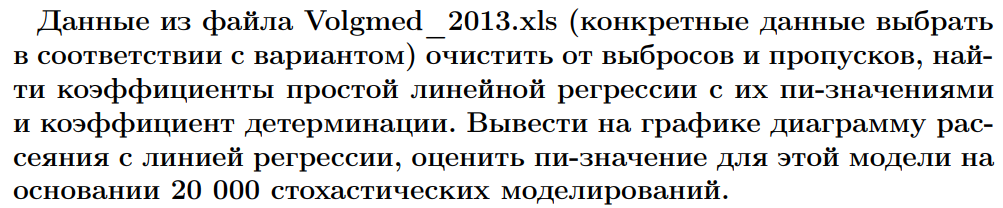

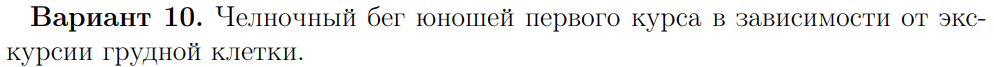

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statsmodels
import statsmodels.api as sm
import warnings

In [95]:
warnings.filterwarnings("ignore", category=FutureWarning)
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Volgmed_2013.xlsx', header=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12375 entries, 0 to 12374
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   № п/п                                    193 non-null    float64       
 1   Пол                                      3190 non-null   object        
 2   Год рождения                             3095 non-null   float64       
 3   Факультет                                3510 non-null   object        
 4   Курс                                     3318 non-null   float64       
 5   Группа                                   3310 non-null   float64       
 6   Год поступления                          3400 non-null   object        
 7   Дата обследования                        12009 non-null  datetime64[ns]
 8   Рост, см                                 2543 non-null   object        
 9   Вес, кг                                

In [96]:
# отбираем нужные данные, удаляем пропуски, преобразуем в тип float
data = data[['Курс', 'Пол', 'Челночный бег, с', 'Экскурсия грудной клетки, см']]
data = data.dropna(how='any')
data = data[(data['Курс'] == 1)]
data = data[(data['Пол'] == 'муж') | (data['Пол'] == 'муж.')]
data = data[data['Челночный бег, с'].apply(lambda x: isinstance(x, float))]
data['Челночный бег, с'] = data['Челночный бег, с'].astype('float')
data

,Курс,Пол,"Челночный бег, с","Экскурсия грудной клетки, см"
389,1.0,муж,19.9,6.0
392,1.0,муж,20.5,5.0
395,1.0,муж,21.2,8.0
401,1.0,муж,20.5,6.0
404,1.0,муж,20.7,8.0
...,...,...,...,...
4085,1.0,муж,21.6,9.0
4087,1.0,муж,21.5,10.0
4089,1.0,муж,21.3,9.0
4091,1.0,муж,21.3,6.0


In [97]:
# избавляемся от выбросов
data = data[['Челночный бег, с', 'Экскурсия грудной клетки, см']]
array=data.to_numpy()

q_025 = np.quantile(array[:, 0], 0.25)
q_075 = np.quantile(array[:, 0], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print('Верхняя граница по челночному бегу =', upper_limit)
print('Нижняя граница по челночному бегу =', lower_limit, '\n')

data = data[(data['Челночный бег, с'] < upper_limit) & (data['Челночный бег, с'] > lower_limit)]


q_025 = np.quantile(array[:, 1], 0.25)
q_075 = np.quantile(array[:, 1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print('Верхняя граница по экскурсии грудной клетки =', upper_limit)
print('Нижняя граница по экскурсии груднгй клетки =', lower_limit, '\n')

data = data[(data['Экскурсия грудной клетки, см'] < upper_limit) & (data['Экскурсия грудной клетки, см'] > lower_limit)]
data = data.sort_values(by='Челночный бег, с')
data

Верхняя граница по челночному бегу = 23.299999999999997
Нижняя граница по челночному бегу = 18.5 

Верхняя граница по экскурсии грудной клетки = 17.0
Нижняя граница по экскурсии груднгй клетки = 1.0 



,"Челночный бег, с","Экскурсия грудной клетки, см"
4047,18.8,13.0
2917,18.9,8.0
407,19.2,5.0
464,19.3,11.0
4033,19.3,9.0
...,...,...
973,22.8,5.0
3372,22.9,9.0
967,23.1,9.0
4065,23.1,7.0


In [98]:
# коэффициенты простой линейной регрессии с их пи-значениями и коэффициент детерминации
X, Y = data['Экскурсия грудной клетки, см'], data['Челночный бег, с']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
res = model.fit()
print(res.summary())

print('\nконстанта =', res.params[0], 'p-значение =', res.pvalues[0])
print('экскурсия грудной клетки =', res.params[1], 'p-значение =', res.pvalues[1])
print('коэффициент детерминации =', res.rsquared)

                            OLS Regression Results                            
Dep. Variable:       Челночный бег, с   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.058
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.305
Time:                        19:45:49   Log-Likelihood:                -281.05
No. Observations:                 217   AIC:                             566.1
Df Residuals:                     215   BIC:                             572.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

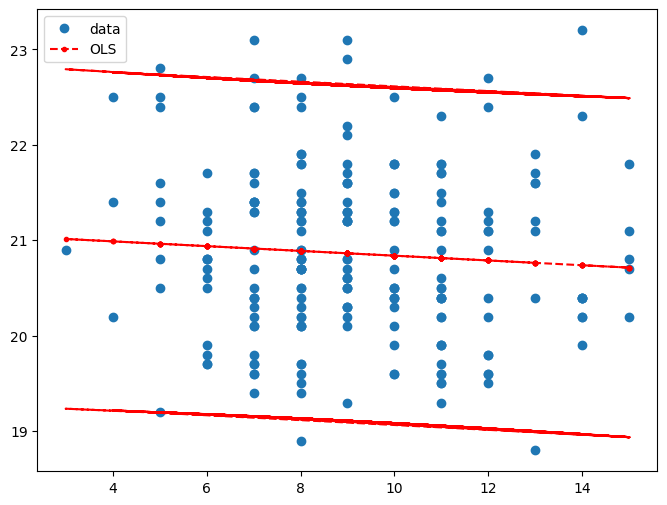

In [99]:
# построение графика
res=sm.OLS(Y, X1).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

In [100]:
# строим эмпирический мост и вычисляем верхнюю оценку p-value
simple_regr_res = Y-res.fittedvalues
sum_regr_res = np.cumsum(simple_regr_res)
sigma = np.std(simple_regr_res)
emp_bridge = sum_regr_res/len(sum_regr_res)**0.5/sigma
J = np.max(np.abs(emp_bridge))
p_value = stats.kstwobign.sf(J)
print('J_n=', J)
print('upper_p_value=', p_value)

J_n= 6.0103672966143575
upper_p_value= 8.388318438908125e-32


In [101]:
# стохастическое моделирование
n_iter = 20000
n = len(X)
counter = 0
for i in range(n_iter):
  Y_temp = stats.norm.rvs(0, 1, n) * sigma + X
  res = sm.OLS(Y_temp, X1).fit()
  simple_regr_res = Y_temp - res.fittedvalues
  sum_regr_res = np.cumsum(simple_regr_res)
  emp_bridge = sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp = np.max(np.abs(emp_bridge))
  if J_temp >J:
    counter += 1
print('эмпирическое пи-значение =', counter/n_iter)

эмпирическое пи-значение = 0.0
